# Titanic Dataset - Feature Engineering

**Student:** Arthur Gislon Leonida

**Objective:** This dataset aims to predict the survival of passengers on the Titanic.

**Dataset URL:** https://www.kaggle.com/competitions/titanic

**Data Dictionary:**

* **survival:** Survival (0 = No, 1 = Yes) - That's the **TARGET**

* **pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

* **sex:** Sex	

* **Age:** Age in years	

* **sibsp:** # of siblings / spouses aboard the Titanic	

* **parch:** # of parents / children aboard the Titanic	

* **ticket:**	Ticket number	

* **fare:** Passenger fare	

* **cabin:** Cabin number	

* **embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [351]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("pandas version:", pd.__version__)
print("os version: built-in")
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("sklearn version:", sklearn.__version__)
print("xgboost version:", xgb.__version__)
print('python version:', os.popen('python --version').read().strip())

pandas version: 2.3.2
os version: built-in
matplotlib version: 3.10.5
seaborn version: 0.13.2
sklearn version: 1.7.1
xgboost version: 3.0.4
python version: Python 3.13.7


In [352]:
# The downloaded dataset has a file named 'Salary Prediction of Data Professions.csv'
train_file_path = 'data/train.csv'
test_file_path = 'data/test.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(train_file_path)

# I won't use this because it doesn't have the target variable (it was made for kaggle competition)
#test_df = pd.read_csv(test_file_path)

print(df.head(5))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Exploratory Data Analysis (EDA)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [354]:
features_description = {
    'PassengerId': 'Passenger ID',
    'Survived': 'Survival (0 = No; 1 = Yes)',
    'Pclass': 'Passenger Class (1st, 2nd, 3rd)',
    'Name': 'Passenger Name',
    'Sex': 'Gender',
    'Age': 'Age in years',
    'SibSp': 'Number of Siblings/Spouses Aboard',
    'Parch': 'Number of Parents/Children Aboard',
    'Ticket': 'Ticket Number',
    'Fare': 'Passenger Fare',
    'Cabin': 'Cabin Number',
    'Embarked': 'Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)'
}

In [355]:
df.isna().sum()
# Age, Cabin, and Embarked have missing values! 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [356]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Applying One-Hot encoding to some features

As shown below, Sex and Embarked can easily be one-hot encoded to [0, 1, 2, ...].

In [357]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [358]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Dropping PassengerId and Name columns (unnecessary for prediction)
df = df.drop(columns=['PassengerId'])

In [359]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


### Filling missing values, converting Name into Title (e.g: Mr.) and then converting Title, Ticket and Cabin to numerical features

In [360]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_13116\2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\arthu\AppData\Local\Temp\ipykernel_13116\2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [361]:
# Ticket features (e.g: A/5 21171)
df['TicketPrefix'] = df['Ticket'].str.extract('([A-Za-z]+)', expand=False).fillna('NONE')
df['TicketPrefix'] = df['TicketPrefix'].astype('category').cat.codes
df['TicketLength'] = df['Ticket'].apply(lambda x: len(str(x)))

# Cabin features
df['CabinDeck'] = df['Cabin'].str[0].fillna('U') # The first character represents the deck
df['CabinDeck'] = df['CabinDeck'].astype('category').cat.codes
df['CabinCount'] = df['Cabin'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0) # e.g: "C23 C25 C27" -> 3 cabins

# Name -> Title (Mr, Miss, Mrs, Master, Other)
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
df['Title'] = df['Title'].apply(lambda x: x if x in common_titles else 'Other')
df['Title'] = df['Title'].astype('category').cat.codes

df['Title'].value_counts()

Title
2    517
1    182
3    125
0     40
4     27
Name: count, dtype: int64

In [362]:
df = df.drop(columns=['Ticket', 'Cabin', 'Name']) # Dropping original Ticket, Cabin, and Name columns
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,TicketLength,CabinDeck,CabinCount,Title
0,0,3,0,22.0,1,0,7.2500,0.0,0,9,8,0,2
1,1,1,1,38.0,1,0,71.2833,1.0,8,8,2,1,3
2,1,3,1,26.0,0,0,7.9250,0.0,15,16,8,0,1
3,1,1,1,35.0,1,0,53.1000,0.0,6,6,2,1,3
4,0,3,0,35.0,0,0,8.0500,0.0,6,6,8,0,2


In [363]:
print(df.dtypes) # Now everything is ready for the baseline model!

Survived          int64
Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked        float64
TicketPrefix       int8
TicketLength      int64
CabinDeck          int8
CabinCount        int64
Title              int8
dtype: object


# Training a baseline model with simple imputations

In [364]:
df.isna().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
TicketPrefix    0
TicketLength    0
CabinDeck       0
CabinCount      0
Title           0
dtype: int64

In [365]:
df_baseline = df.copy()
df_baseline.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,TicketLength,CabinDeck,CabinCount,Title
0,0,3,0,22.0,1,0,7.2500,0.0,0,9,8,0,2
1,1,1,1,38.0,1,0,71.2833,1.0,8,8,2,1,3
2,1,3,1,26.0,0,0,7.9250,0.0,15,16,8,0,1
3,1,1,1,35.0,1,0,53.1000,0.0,6,6,2,1,3
4,0,3,0,35.0,0,0,8.0500,0.0,6,6,8,0,2


### Splitting the dataset into training and test

In [366]:
X_train, X_test, y_train, y_test = train_test_split(df_baseline.drop(columns=['Survived']), df_baseline['Survived'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((712, 12), (179, 12))

In [367]:
X_train[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,TicketLength,CabinDeck,CabinCount,Title
331,1,0,45.5,0,0,28.5000,0.0,6,6,2,1,2
733,2,0,23.0,0,0,13.0000,0.0,6,5,8,0,2
382,3,0,32.0,0,0,7.9250,0.0,15,17,8,0,2
704,3,0,26.0,1,0,7.8542,0.0,6,6,8,0,2
813,3,1,6.0,4,2,31.2750,0.0,6,6,8,0,1


In [368]:
y_train[:5]

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [369]:
y_train.value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

### Creating and predicting with baseline model (for future comparison)

In [370]:
# Train a simple XGBoost model
baseline_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluate the model
preds = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, preds)
print(f'Baseline model accuracy: {baseline_accuracy:.4f}')

Baseline model accuracy: 0.8156


# Trying to improve the baseline model with Feature Engineering

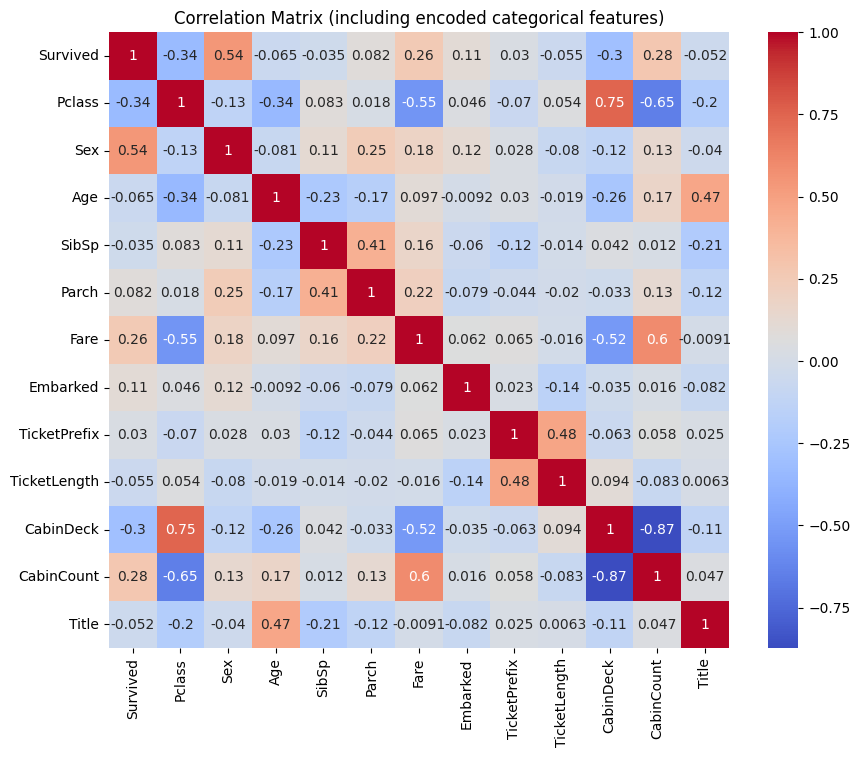

Most correlated features with 'Survived' (by absolute value):
Sex          0.543351
Pclass       0.338481
CabinDeck    0.301116
Name: Survived, dtype: float64

Least correlated features with 'Survived' (by absolute value):
TicketPrefix    0.030179
SibSp           0.035322
Title           0.052471
Name: Survived, dtype: float64


In [371]:
corr_matrix = df_baseline.corr()
target_corr = corr_matrix['Survived'].drop('Survived').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix (including encoded categorical features)')
plt.show()

print("Most correlated features with 'Survived' (by absolute value):")
print(target_corr.abs().sort_values(ascending=False).head(3))
print("\nLeast correlated features with 'Survived' (by absolute value):")
print(target_corr.abs().sort_values().head(3))

In [ ]:
df_eng = df.copy()

# --- Foundational Features ---
df_eng['FamilySize'] = df_eng['SibSp'] + df_eng['Parch'] + 1
df_eng['IsAlone'] = (df_eng['FamilySize'] == 1).astype(int)

# --- Transformation & Interaction Features ---
df_eng['Age*Pclass'] = df_eng['Age'] * df_eng['Pclass'] # capture interaction between age and passenger class
df_eng.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,TicketLength,CabinDeck,CabinCount,Title,FamilySize,IsAlone,Age*Pclass
0,0,3,0,22.0,1,0,7.2500,0.0,0,9,8,0,2,2,0,66.0
1,1,1,1,38.0,1,0,71.2833,1.0,8,8,2,1,3,2,0,38.0
2,1,3,1,26.0,0,0,7.9250,0.0,15,16,8,0,1,1,1,78.0
3,1,1,1,35.0,1,0,53.1000,0.0,6,6,2,1,3,2,0,35.0
4,0,3,0,35.0,0,0,8.0500,0.0,6,6,8,0,2,1,1,105.0


In [375]:
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(df_eng.drop(columns=['Survived']), df_eng['Survived'], test_size=0.2, random_state=42)

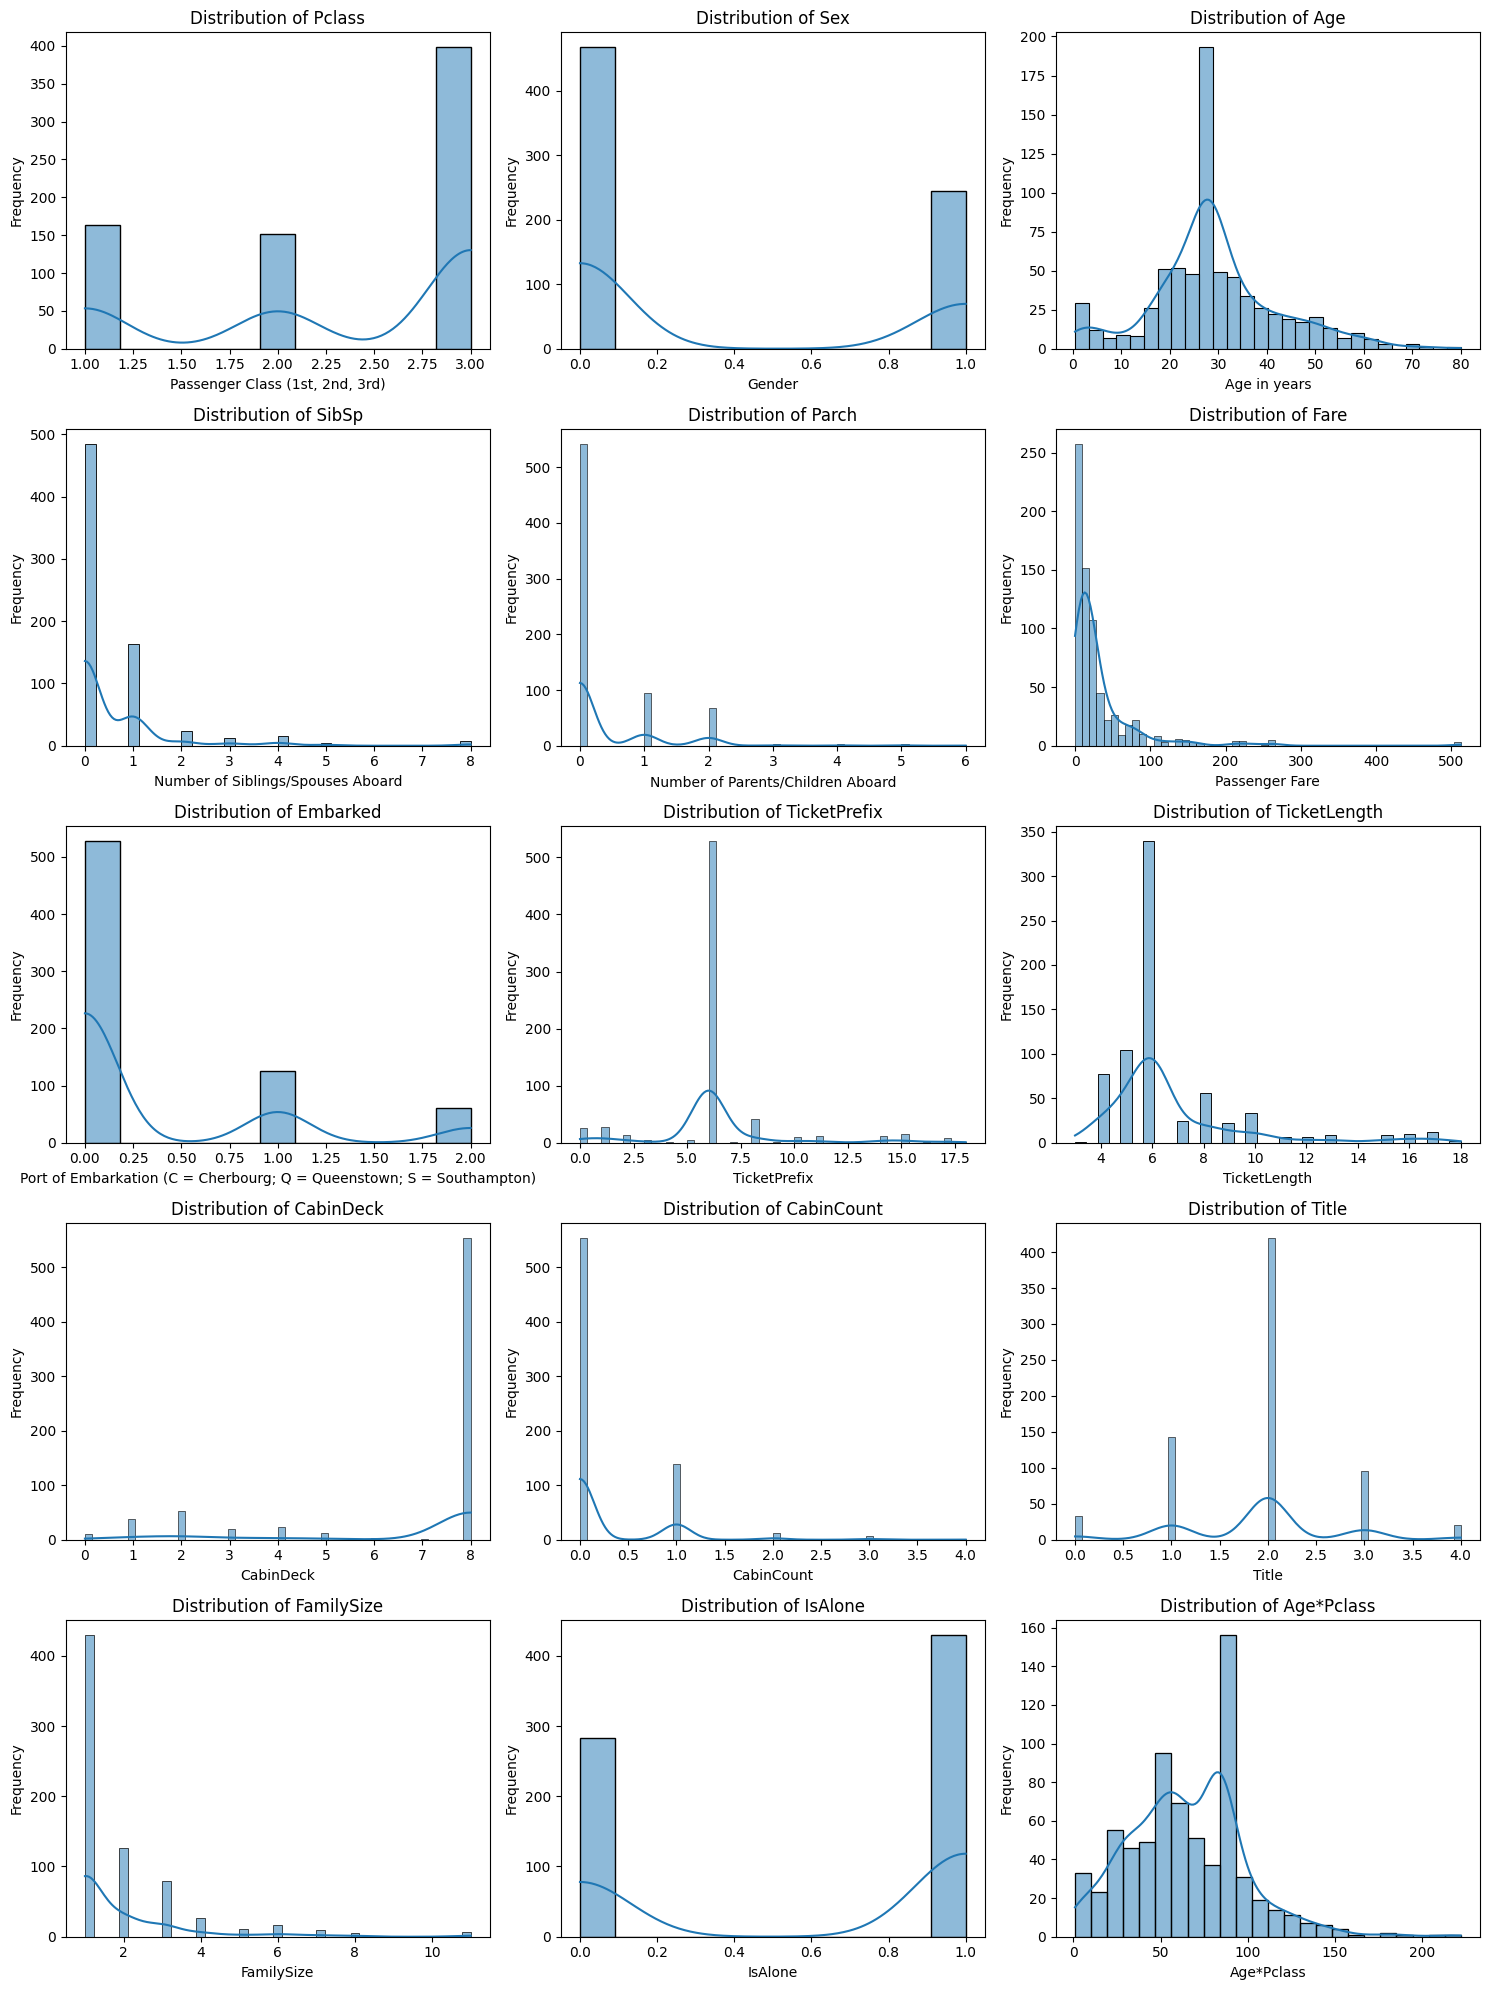

In [377]:
numeric_features = X_train_eng.select_dtypes(include=['number']).columns
num_plots = len(numeric_features)
cols = 3
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))

for i, feature in enumerate(numeric_features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(X_train_eng[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(features_description.get(feature, feature))
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()